In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

y = 0.83929 x + 0.07143


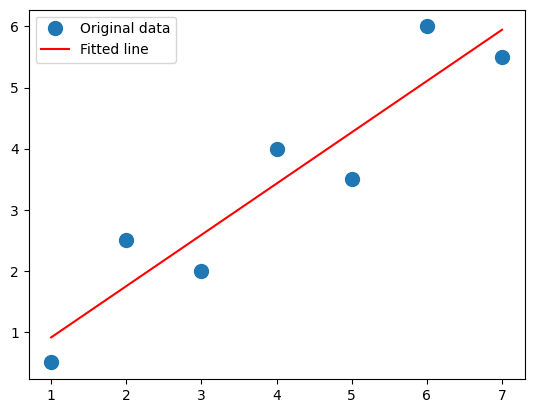

In [2]:
def linear_approximation():
    """
    Aproksymuje dane do prostej liniowej.

    Funkcja przeprowadza aproksymację danych do prostej liniowej postaci y = ax + b, gdzie a to współczynnik kierunkowy,
    a b to wyraz wolny prostej. Wartości współczynników a i b są wyznaczane za pomocą metody najmniejszych kwadratów.
    Funkcja wyświetla także równanie prostej liniowej oraz generuje wykres, który zawiera punkty danych oryginalnych
    (kolor niebieski) oraz dopasowaną linię prostą (kolor czerwony).

    Wykres:
    Funkcja generuje wykres, który zawiera punkty danych oryginalnych (kolor niebieski) oraz dopasowaną linię prostą
    (kolor czerwony). Wykres ten przedstawia graficznie, jak aproksymacja pasuje do danych oryginalnych.
    
    Przykład wyniku:
    Równanie prostej liniowej zostanie wyświetlone na konsoli,
    a wykres z punktami danych i dopasowaną linią prostą zostanie wyświetlony.
    """

    # Definiowanie tablic x i y
    x = np.array([1, 2, 3, 4, 5, 6, 7])
    y = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

    # Tworzenie macierzy A, gdzie pierwsza kolumna to x, a druga kolumna to 1
    A = np.vstack([x, np.ones(len(x))]).T

    # Wykorzystanie metody najmniejszych kwadratów (least squares) do dopasowania prostej liniowej
    # do danych x i y. Zwracane są współczynniki a i b.
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]

    # Wyświetlenie równania prostej liniowej
    print("y =", round(a, 5), "x +", round(b, 5))

    # Wykres danych oryginalnych
    _ = plt.plot(x, y, 'o', label='Original data', markersize=10)
    # Wykres dopasowanej linii
    _ = plt.plot(x, a*x + b, 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()

linear_approximation()

Dropdown(description='Choose a plot:', options=('Wykres danych', 'Wykres sinusa', 'Wykres indeksu MSCI World')…

IntSlider(value=1, description='Degree', max=10, min=1)

Button(description='Wykreśl', style=ButtonStyle())

Output()

y = 11.66286 * x^1 + -3.72381 * x^0


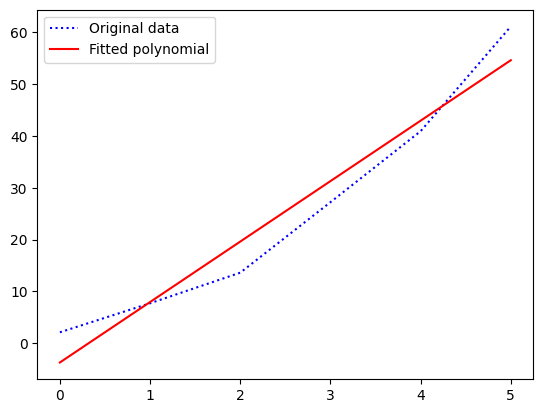

y = 1.86071 * x^2 + 2.35929 * x^1 + 2.47857 * x^0


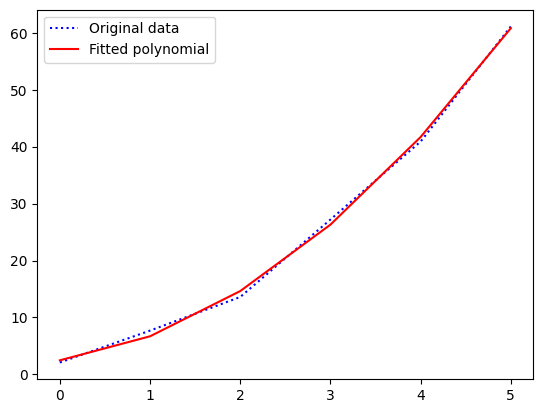

y = -0.0 * x^2 + -0.29487 * x^1 + 0.92635 * x^0


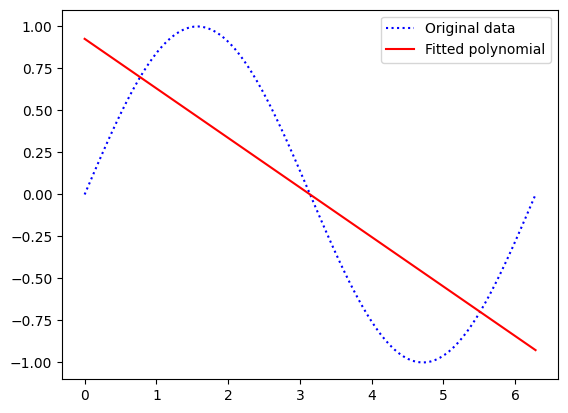

y = -0.0 * x^2 + -0.29487 * x^1 + 0.92635 * x^0


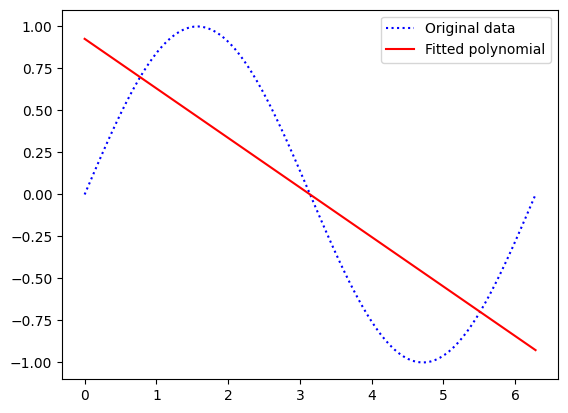

y = 0.09227 * x^3 + -0.8696 * x^2 + 1.87971 * x^1 + -0.18355 * x^0


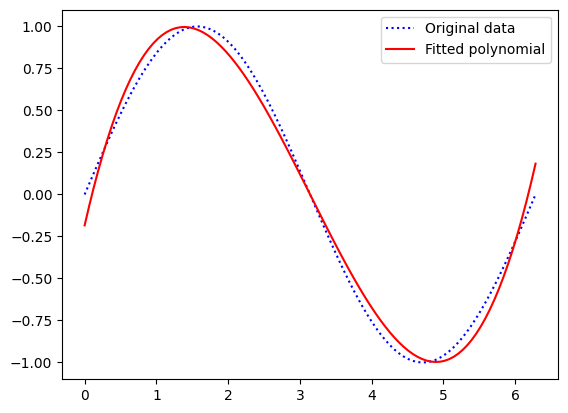

y = 0.27552 * x^3 + -1094.6527 * x^2 + 1087314.39952 * x^1 + 1630.46245 * x^0


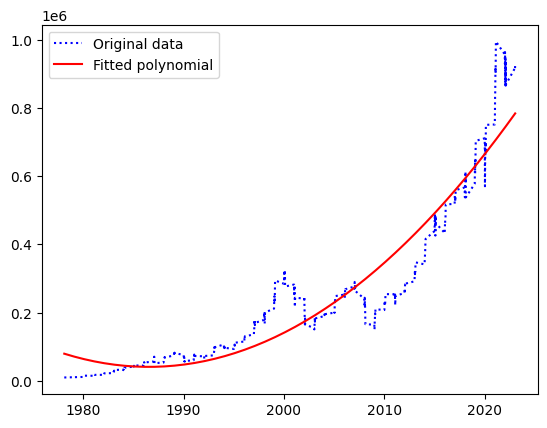

In [ ]:
def polynomial_approximation(x, y, degree):
    """
    Aproksymuje dane do wielomianu o podanym stopniu.

    Funkcja przeprowadza aproksymację danych do wielomianu o zadanym stopniu. Wykorzystuje metodę najmniejszych kwadratów
    (least squares) do znalezienia najlepszego dopasowania wielomianu do danych. Następnie wyświetla równanie aproksymacji
    wielomianowej oraz generuje wykres, który przedstawia dane oryginalne (w kolorze niebieskim) i dopasowany wielomian
    (w kolorze czerwonym).

    Argumenty:
    x: Tablica wartości zmiennej niezależnej.
    y: Tablica wartości zmiennej zależnej.
    degree: Stopień wielomianu.

    Zwracane wartości:
    Współczynniki wielomianu w postaci wektora [a, b, c, d...].
    """

    # Tworzenie macierzy A, gdzie pierwsza kolumna to x^degree, druga kolumna to x^(degree-1), ..., ostatnia kolumna to 1.
    A = np.vander(x, degree+1)

    # Wykorzystanie metody najmniejszych kwadratów (least squares) do dopasowania wielomianu o podanym stopniu
    # do danych x i y. Zwracane są współczynniki a, b, c, d.
    a = np.linalg.lstsq(A, y, rcond=None)[0]

    # Wyświetlanie równania aproksymacji wielomianowej
    equation = "y = " + " + ".join([f"{round(coeff, 5)} * x^{degree - i}" for i, coeff in enumerate(a)])
    print(equation)

    # Wykres danych oryginalnych
    plt.plot(x, y, 'b:', label='Original data', markersize=5)
    
    # Obliczanie wartości aproksymacji wielomianowej dla punktów x
    approximation = np.polyval(a, x)
    
    # Wykres aproksymacji wielomianowej
    plt.plot(x, approximation, 'r', label='Fitted polynomial')
    plt.legend()
    plt.show()



# Tworzenie rozwijanej listy (dropdown)
# Funkcja obsługująca zmiany wybranej wartości
def draw_plot(change):
    if dropdown.value == 'Wykres danych':
        x = np.array([0, 1, 2, 3, 4, 5]) 
        y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
        polynomial_approximation(x, y, degree_slider.value)
        
    elif dropdown.value == 'Wykres sinusa':
        x = np.linspace(0, 2 * np.pi, 100)
        y = np.sin(x)
        polynomial_approximation(x, y, degree_slider.value)

    elif dropdown.value == 'Wykres indeksu MSCI World':
        with open('msci_index.txt', 'r') as file:
            data = file.read() 
        data_dict = eval(data)
        x = np.array(data_dict['x'])
        y = np.array(data_dict['y'])  # Add this line to define 'y'
        polynomial_approximation(x, y, degree_slider.value)

# Tworzenie rozwijanej listy (dropdown)
dropdown = widgets.Dropdown(options=['Wykres danych', 'Wykres sinusa', 'Wykres indeksu MSCI World'], description='Choose a plot:')

# Tworzenie przycisku "wykreśl"
plot_button = widgets.Button(description='Wykreśl')

# Funkcja obsługująca kliknięcie przycisku "wykreśl"
def on_plot_button_clicked(b):
    draw_plot(None)

# Przypisanie funkcji do obsługi kliknięcia przycisku
plot_button.on_click(on_plot_button_clicked)

# Tworzenie suwaka do wyboru stopnia wielomianu
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1 ,description='Degree')

# Tworzenie obszaru wyświetlania wyników
output_area = widgets.Output()

# Wyświetlenie widżetów
display(dropdown)
display(degree_slider)
display(plot_button)
display(output_area)